<a href="https://colab.research.google.com/github/chgiesse/Data-Science/blob/main/Corona_Datenanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as md
from datetime import timedelta

In [ ]:
data = pd.read_csv("https://opendata.arcgis.com/api/v3/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/downloads/data?format=csv&spatialRefId=4326")


In [ ]:
data.shape 

(3667804, 18)

In [ ]:
data_world = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [ ]:
data_world["date"] = pd.to_datetime(data_world.date, format='%Y.%m.%d', exact=False)


#### Umwandeln der Datumsformate

In [ ]:
data["Datenstand"] = pd.to_datetime(data.Datenstand, format='%d.%m.%Y', exact=False)

data["Meldedatum"] = pd.to_datetime(data.Meldedatum).dt.tz_localize(None)

data["Refdatum"] = pd.to_datetime(data.Refdatum).dt.tz_localize(None)

data[["Refdatum","Meldedatum","Datenstand"]]

#### 1. Gesamtzahl Infizierte

In [ ]:
data[ (data["NeuerFall"] == 1) | (data["NeuerFall"] == 0)]["AnzahlFall"].sum()

8681447

#### 2. Gesamtzahl Todesfälle

In [ ]:
data[ (data["NeuerTodesfall"] == 1) | (data["NeuerTodesfall"] == 0)]["AnzahlTodesfall"].sum()

116718

In [ ]:
gefiltert_inf = data[(data.NeuerFall == 0) | (data.NeuerFall == 1)]
gefiltert_tod = data[(data.NeuerTodesfall == 0) | (data.NeuerTodesfall == 1)]

#### 3. Zahl der Infizierten nach Altersgruppen und Geschlecht

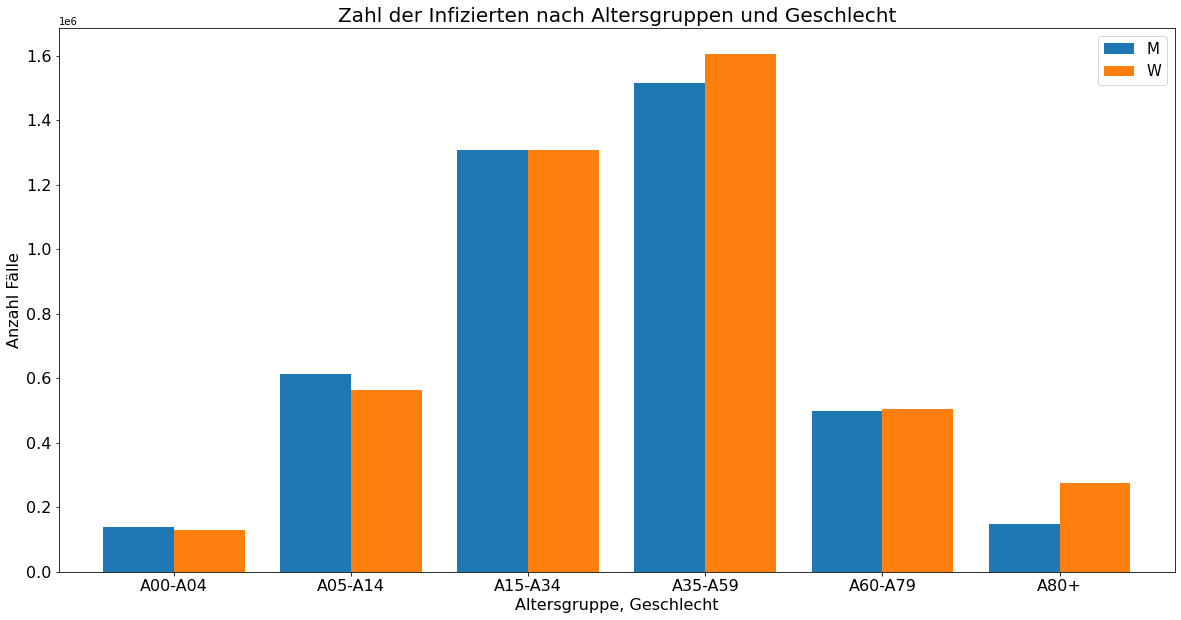

In [ ]:
data_geschl = gefiltert_inf[(gefiltert_inf.Geschlecht == "M") | (gefiltert_inf.Geschlecht == "W")]

data_fil_inf = pd.DataFrame((data_geschl.groupby(["Altersgruppe", "Geschlecht"])["AnzahlFall"].sum())) 
ax = data_fil_inf.pivot_table(index='Altersgruppe', columns='Geschlecht')[:-1].plot(kind = 'bar', 
                                                                      y = 'AnzahlFall', 
                                                                      figsize = [20,10], 
                                                                      width = 0.8,
                                                                      ylabel = "Anzahl Fälle",
                                                                      title = " Zahl der Infizierten nach Altersgruppen und Geschlecht", 
                                                                      rot=0, 
                                                                      fontsize=16
                                                                      )
ax.set_title("Zahl der Infizierten nach Altersgruppen und Geschlecht", fontsize=20)
ax.set_xlabel("Altersgruppe, Geschlecht", fontsize=16)
ax.set_ylabel("Anzahl Fälle", fontsize=16)
ax.legend(fontsize=15)

#### 4. Zahl der Toten nach Altersgruppe und Geschlecht

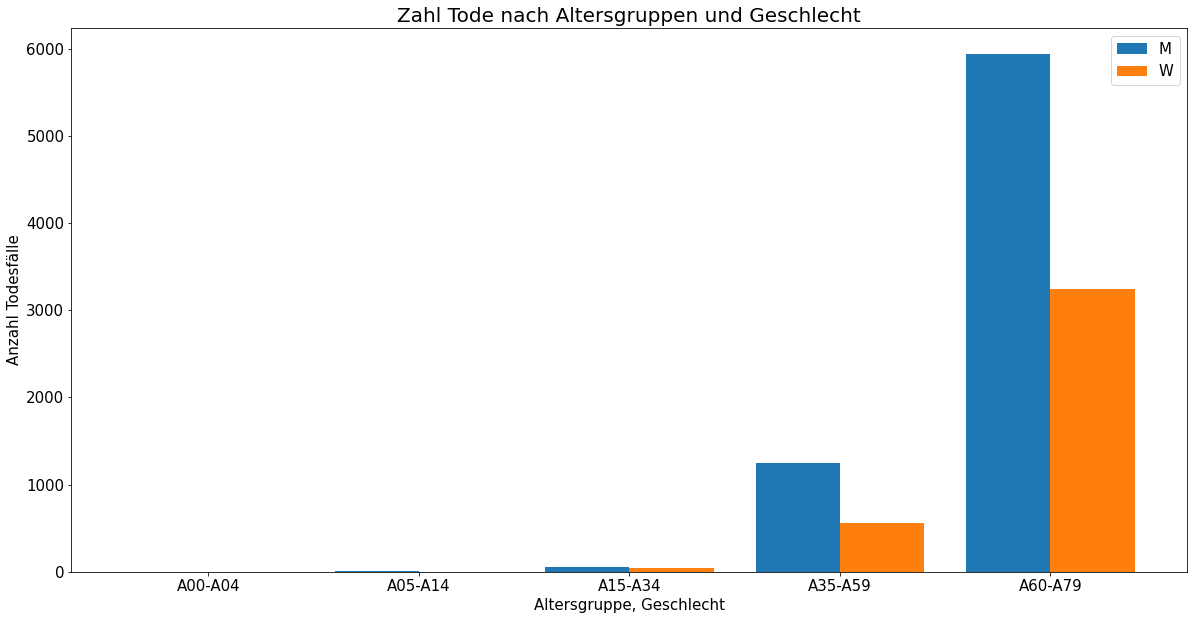

In [ ]:
data_geschl = gefiltert_tod[(gefiltert_tod.Geschlecht == "M") | (gefiltert_tod.Geschlecht == "W")]

data_fil_tod = pd.DataFrame((data_geschl.groupby(["Altersgruppe", "Geschlecht"])["AnzahlTodesfall"].sum())) 
ax = data_fil_tod.pivot_table(index='Altersgruppe', columns='Geschlecht')[:-1].plot(kind = 'bar', 
                                                                      y = 'AnzahlTodesfall', 
                                                                      figsize = [20,10], 
                                                                      width = 0.8, 
                                                                      rot=0,
                                                                      fontsize=15
                                                                      )
ax.set_xlabel("Altersgruppe, Geschlecht", fontsize=15)
ax.set_ylabel("Anzahl Todesfälle", fontsize=15)
ax.set_title("Zahl Tode nach Altersgruppen und Geschlecht", fontsize=20)
ax.legend(fontsize=15)

#### 5. Verhältnis Zahl der Verstorbenen zur Zahl der Infizierten nach Altersgruppen und Geschlecht 

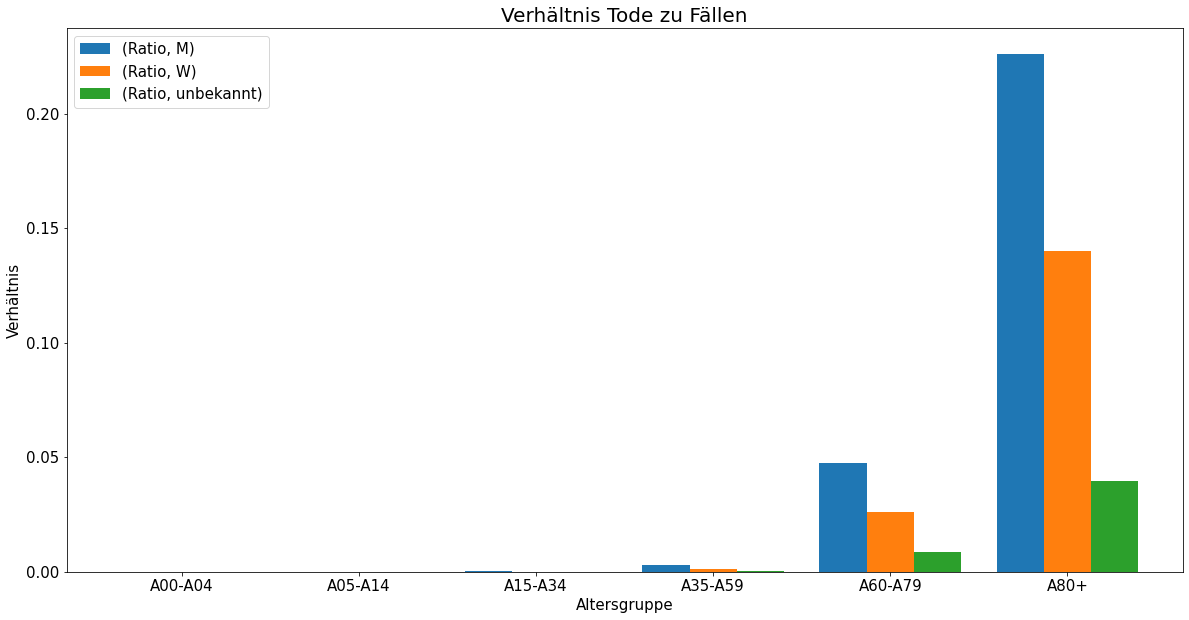

In [ ]:
data_fil_rel = data.groupby(["Altersgruppe", "Geschlecht"])[["AnzahlTodesfall", "AnzahlFall"]].sum()
ratio = pd.DataFrame(data_fil_rel["AnzahlTodesfall"]/data_fil_rel["AnzahlFall"], columns=["Ratio"]).reset_index(level=1)
ax = ratio.pivot_table(index="Altersgruppe", columns="Geschlecht")[:-1].plot(kind = 'bar', 
                                                                   figsize = [20,10], 
                                                                   width = 0.8, 
                                                                   rot = 0,
                                                                   fontsize=15)

ax.set_title("Verhältnis Tode zu Fällen", fontsize=20)
ax.set_xlabel("Altersgruppe", fontsize=15)
ax.set_ylabel("Verhältnis", fontsize=15)
ax.legend(fontsize=15)

In [ ]:
x = data.groupby(["Altersgruppe", "Geschlecht"])[["AnzahlTodesfall", "AnzahlFall"]].sum().reset_index(level=1)
x[(x.Geschlecht == "M") | (x.Geschlecht == "W")]

ratio

,Geschlecht,Ratio
Altersgruppe,,
A00-A04,M,0.000023
A00-A04,W,0.000077
A00-A04,unbekannt,0.000000
A05-A14,M,0.000034
A05-A14,W,0.000006
A05-A14,unbekannt,0.000000
A15-A34,M,0.000145
A15-A34,W,0.000100
A15-A34,unbekannt,0.000000


#### 6. Zeitverlauf der Zahl der Neuinfizierten 

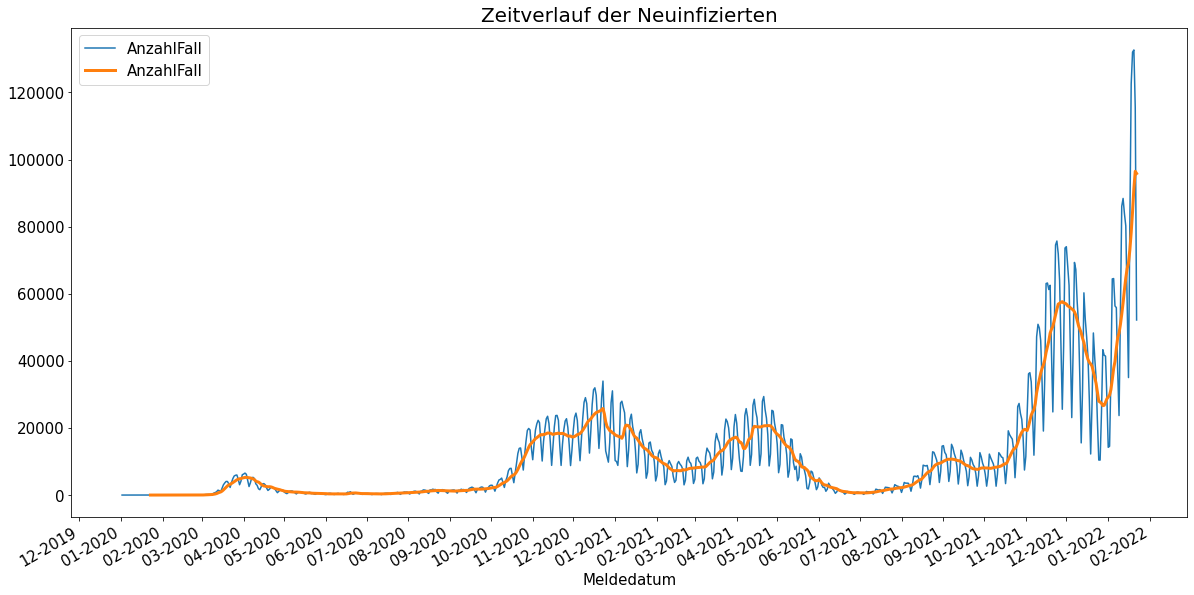

In [ ]:
gefiltert_inf = data[(data.NeuerFall == 0) | (data.NeuerFall == 1)]

summe = gefiltert_inf.groupby("Meldedatum")["AnzahlFall"].sum()
schnitt = summe.rolling(7).mean()

ax = summe.plot(figsize=(20,10))
schnitt.plot(ax=ax, fontsize=15, lw=3)

ax.legend(["Fallzahlen", "7TageSchnitt"])
ax.set_xlabel("Meldedatum", fontsize=15)
ax.set_title("Zeitverlauf der Neuinfizierten", fontsize=20)
#ax.set_axisbelow(True)
#ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.legend(fontsize=15)


#### 7. Zeitverlauf der Neu Verstorbenen

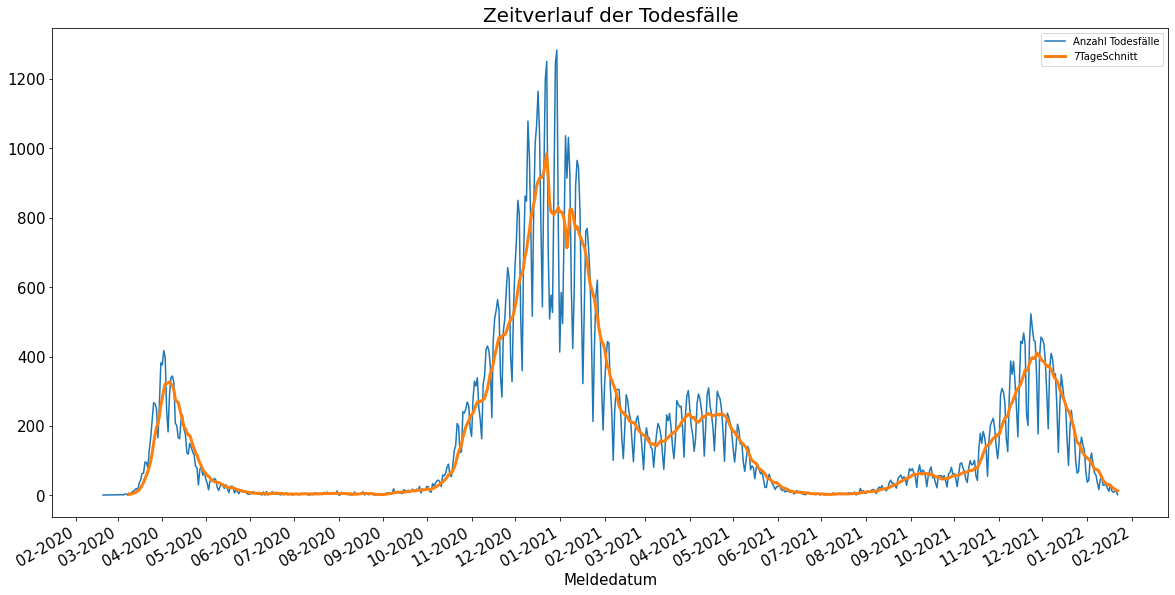

In [ ]:
gefiltert_tod = data[(data["NeuerTodesfall"] == 0) | (data["NeuerTodesfall"] == 1)]
summe_tod = gefiltert_tod.groupby("Meldedatum")["AnzahlTodesfall"].sum()
schnitt_tod = summe_tod.rolling(7).mean()

ax_tod = summe_tod.plot(figsize=(20,10))
schnitt_tod.plot(ax=ax_tod, lw=3, fontsize=15)

ax_tod.legend(["Anzahl Todesfälle", "7TageSchnitt"])

ax_tod.set_axisbelow(True)
ax_tod.set_xlabel("Meldedatum", fontsize=15)
ax_tod.set_title("Zeitverlauf der Todesfälle", fontsize=20)
#ax_tod.grid()
ax_tod.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax_tod.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.legend(fontsize=15)

#### 7.1 Zeitverlauf der Gesamtzahl der Verstorbenen

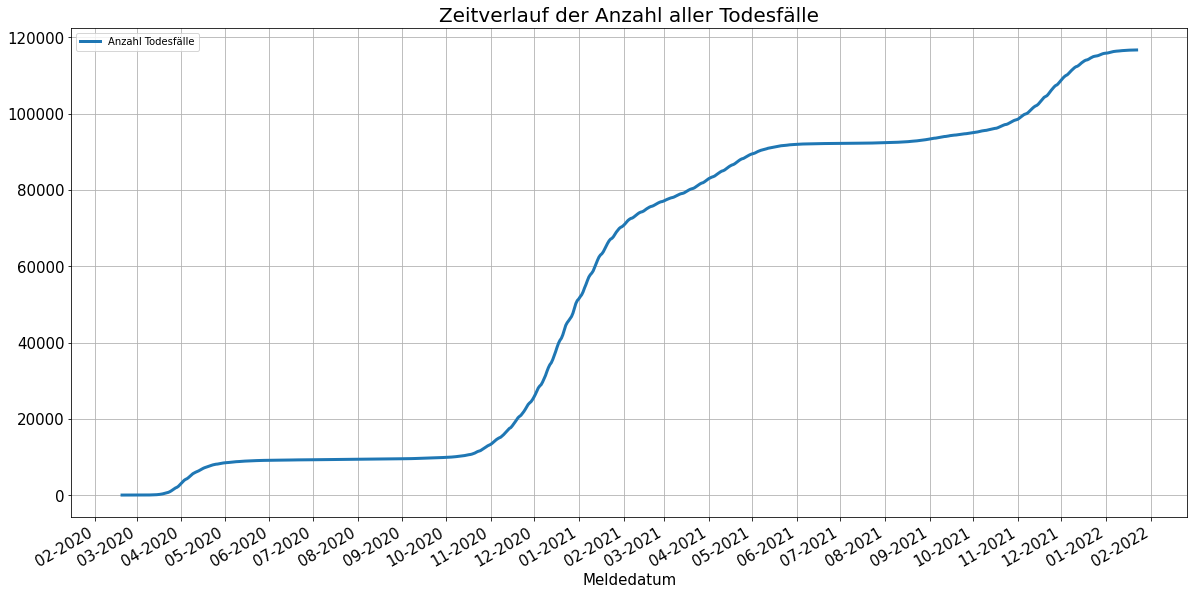

In [ ]:
gefiltert_tod = data[(data["NeuerTodesfall"] == 0) | (data["NeuerTodesfall"] == 1)]
summe_tod = gefiltert_tod.groupby("Meldedatum")["AnzahlTodesfall"].sum()
#schnitt_tod = summe_tod.rolling(7).mean()

ax_tod = np.cumsum(summe_tod).plot(figsize=(20,10), fontsize=15, lw=3)

ax_tod.legend(["Anzahl Todesfälle"])
ax_tod.set_title("Zeitverlauf der Anzahl aller Todesfälle", fontsize=20)
ax_tod.set_xlabel("Meldedatum", fontsize=15)
ax.set_ylabel("Todesfälle", fontsize=15)
ax_tod.grid()
ax_tod.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax_tod.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.legend(fontsize=15)

#### 8. "7-Tage Inzidenz" im Zeitverlauf

In [ ]:
# Laden Der Bewohner Tabelle

einwohner = pd.read_csv("https://raw.githubusercontent.com/oliverhummel/rki_ds/main/einwohnerzahlen.csv", 
                        sep=";", decimal=",")

einwohner_de = einwohner[(einwohner.Bezeichnung == "Land")]["Bevölkerung"].sum()

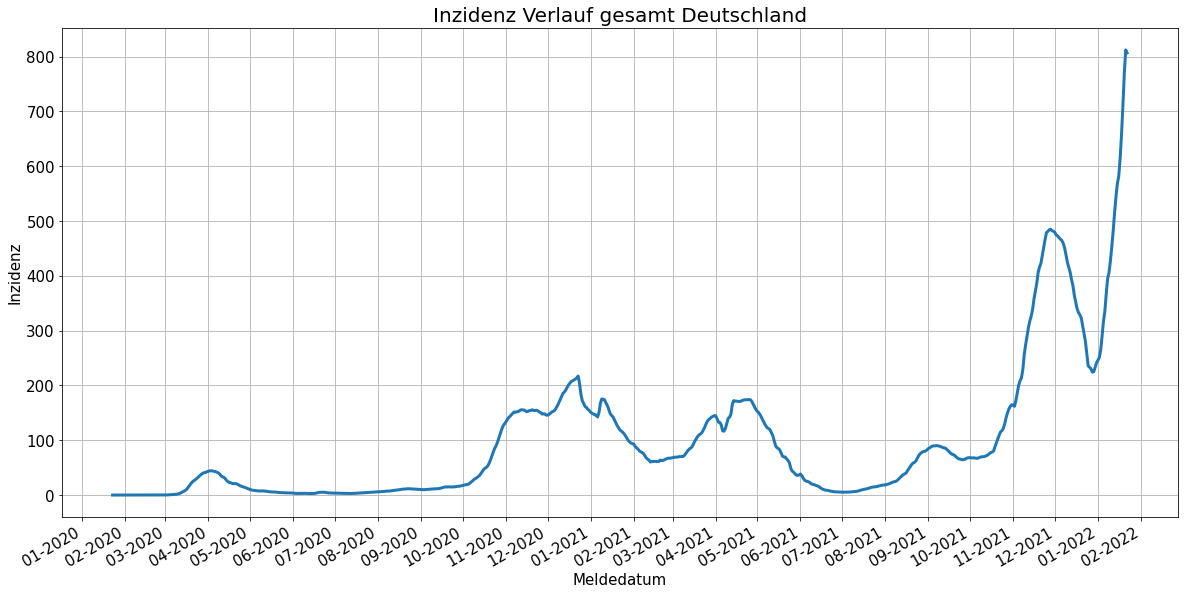

In [ ]:
summe_inz = summe.rolling(7).sum()/einwohner_de*100000

ax = summe_inz.plot(figsize=[20,10], fontsize=15, lw=3)

ax.set_ylabel("Inzidenz", fontsize=15)
ax.set_xlabel("Meldedatum", fontsize=15)
ax.set_title("Inzidenz Verlauf gesamt Deutschland", fontsize=20)
ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import openpyxl

sba = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/SBA_BV.xlsx")
sba.columns = sba.iloc[3]
Bevölkerung = sba[5:97]

A00_A04 = pd.DataFrame(Bevölkerung[0:5].sum(), columns=["A00-A04"])
A05_A14 = pd.DataFrame(Bevölkerung[5:15].sum(), columns=["A05-A14"])
A15_A34 = pd.DataFrame(Bevölkerung[15:35].sum(), columns=["A15-A34"])
A35_A59 = pd.DataFrame(Bevölkerung[35:60].sum(), columns=["A35-A59"])
A60_A79 = pd.DataFrame(Bevölkerung[60:80].sum(), columns=["A60-A79"])
A80 = pd.DataFrame(Bevölkerung[80:-1].sum(), columns=["A80+"])

bv_df = A00_A04.join(A05_A14).join(A15_A34).join(A35_A59).join(A60_A79).join(A80)[1:]
 

In [ ]:
bv_ag_df = bv_df.sum()
bv_ag_df

A00-A04     3969138.0
A05-A14     7508662.0
A15-A34    18921292.0
A35-A59    28666166.0
A60-A79    18153339.0
A80+        5936434.0
dtype: float64

#### 9. "7-Tage Inzidenz" nach Altersgruppen im Zeitverlauf

In [ ]:
summe_inz_wm = pd.DataFrame(gefiltert_inf.groupby(["Meldedatum", "Altersgruppe"])
                            ["AnzahlFall"].sum()).reset_index(level=1)

altersgruppen = summe_inz_wm.Altersgruppe.unique()

inz_ag_sum_all = pd.DataFrame(index=summe_inz_wm.index.unique())

for altersgruppe in altersgruppen[:-1]:
    
    inz_ag_sum = summe_inz_wm[(summe_inz_wm.Altersgruppe == altersgruppe)].rolling(7).sum()/bv_ag_df[altersgruppe]*100000
    inz_ag_sum_all = inz_ag_sum_all.join(inz_ag_sum, lsuffix="Meldedatum")

inz_ag_sum_all.columns = altersgruppen[:-1]

ax = inz_ag_sum_all.plot(kind="line", 
                    figsize=[20,10],
                    fontsize=15,
                    lw=4
                    )

ax.set_axisbelow(True)
#ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.set_xlabel("Meldedatum", fontsize=15)
ax.set_ylabel("inzidenz", fontsize=15)
ax.set_title("Inzidenz der Altersgruppen im Zeitverlauf", fontsize=20)
ax.legend(fontsize=15)

### 7 Tage Inzidenz nach Bundesländern 

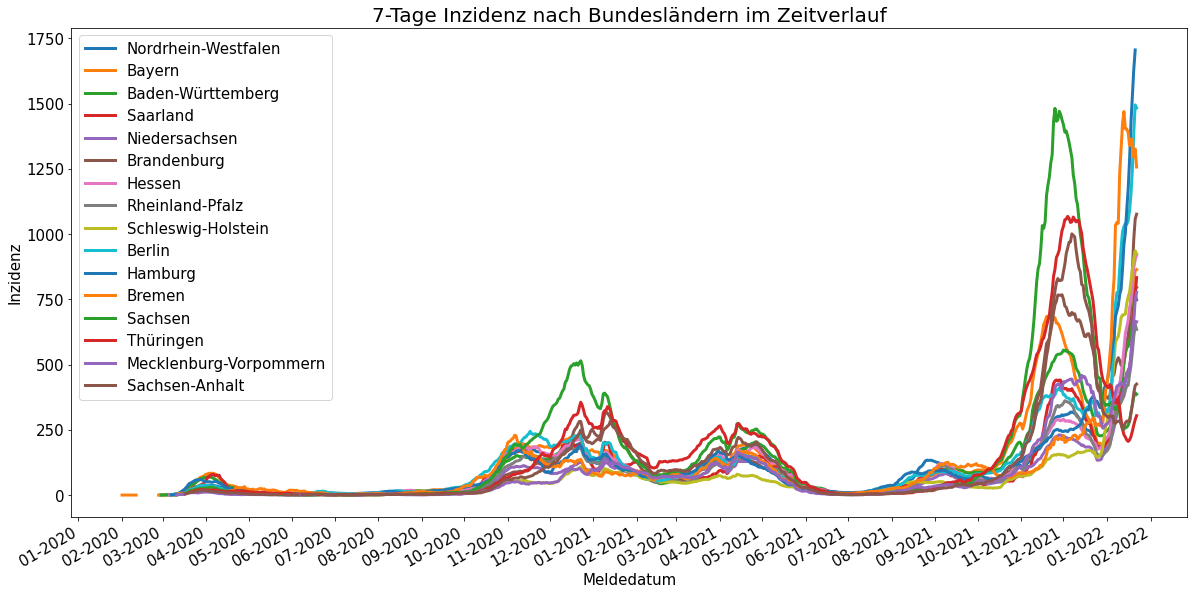

In [ ]:
bv_bl_df = bv_df.transpose().sum()

summe_inz_bl = pd.DataFrame(gefiltert_inf.groupby(["Meldedatum", "Bundesland"])
                            ["AnzahlFall"].sum()).reset_index(level=1)

bundeslaender = summe_inz_bl.Bundesland.unique()

inz_bl_sum_all = pd.DataFrame(index=summe_inz_bl.index.unique())

for bundesland in bundeslaender:
    
    inz_bl_sum = summe_inz_bl[(summe_inz_bl.Bundesland == bundesland)].rolling(7).sum()/bv_bl_df[bundesland]*100000
    inz_bl_sum_all = inz_bl_sum_all.join(inz_bl_sum, lsuffix="Meldedatum")

inz_bl_sum_all.columns = bundeslaender

ax = inz_bl_sum_all.plot(kind="line", 
                    figsize=[20,10],
                    lw=3,
                    fontsize=15
                    )

ax.set_axisbelow(True)
#ax.grid()
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.set_title("7-Tage Inzidenz nach Bundesländern im Zeitverlauf", fontsize=20)
ax.set_ylabel("Inzidenz", fontsize=15)
ax.set_xlabel("Meldedatum", fontsize=15)
ax.legend(fontsize=15)

### PCA der Pundesländer mit unsklalierten Daten 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Gesamtvarianz 416803.51880389475


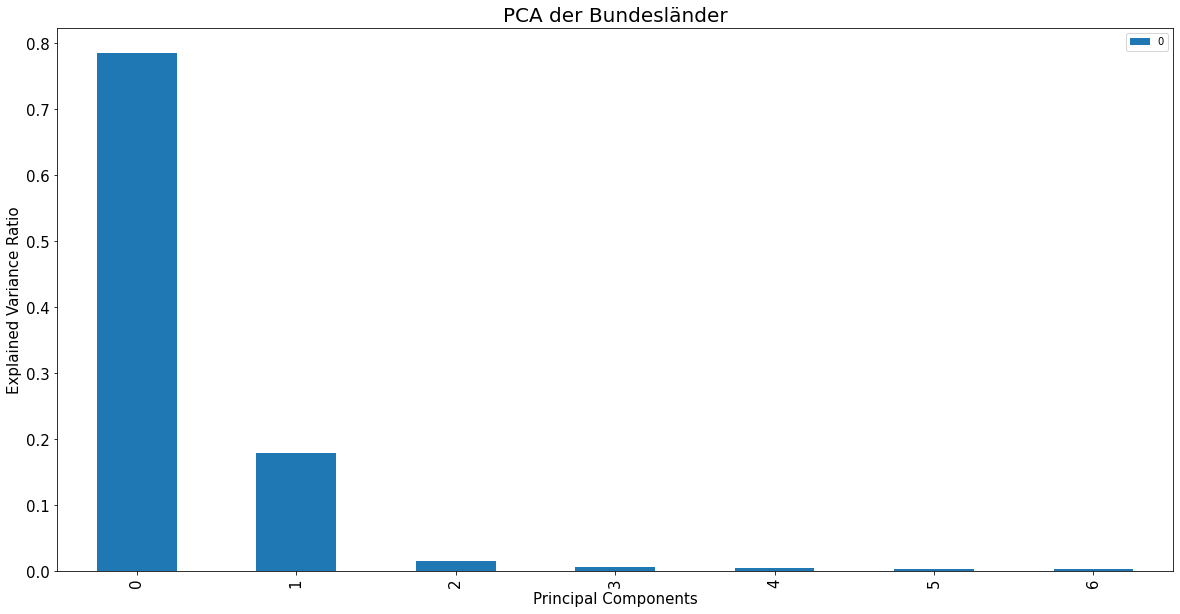

In [ ]:
df_bl_pca = inz_bl_sum_all.fillna(0)#.groupby(pd.Grouper(freq='M')).sum()#.transpose()

n_comp = df_bl_pca.shape[1]

pca = PCA(n_components=7, random_state=0)

pca_zr = pd.DataFrame(pca.fit_transform(df_bl_pca), index=df_bl_pca.index)

print("Gesamtvarianz", pca.explained_variance_.sum())

ax = pd.DataFrame(pca.explained_variance_ratio_).plot(kind="bar",
                                            xlabel="Anzahl Principal Components", 
                                           ylabel= "Erklärte Varianz", 
                                           figsize=[20,10],
                                           title = "PCA mit unskalierten Daten",
                                           fontsize=15)

ax.set_title("PCA der Bundesländer", fontsize=20)
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_ylabel("Explained Variance Ratio", fontsize=15)

a = zip(range(1, n_comp+1), pca.explained_variance_ratio_)
a = pd.DataFrame(a, columns=["Principal components", "Explained variance"])


Text(0.5, 1.0, 'Coronaverlauf dargestellt durch die erste Principal Component bei Bundesländern')

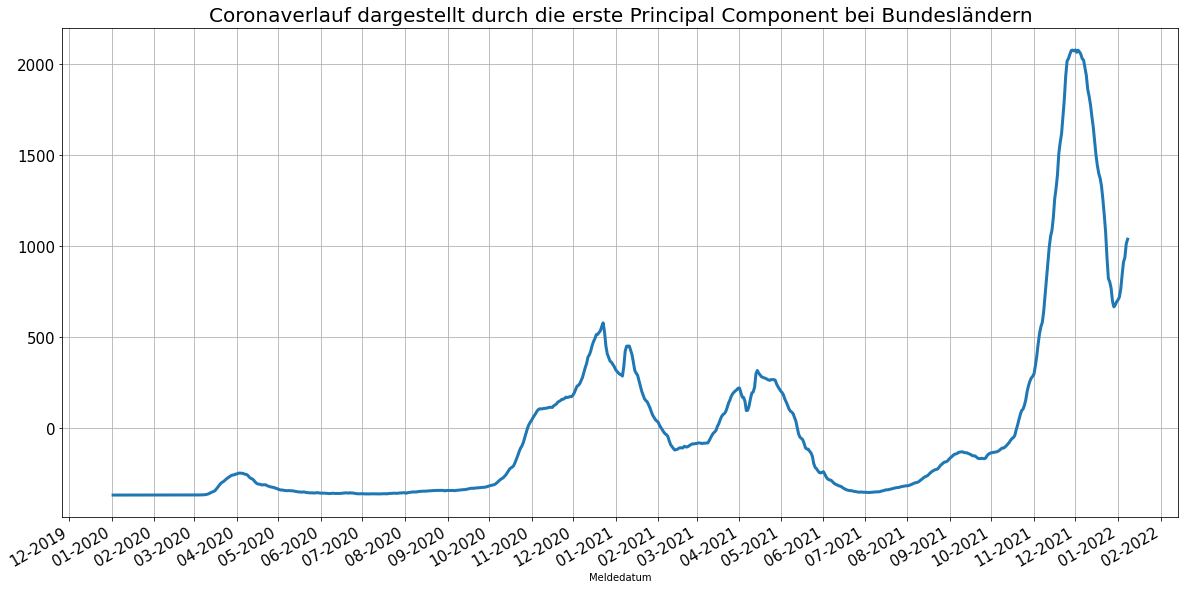

In [ ]:
ax_pc_bl = pca_zr[0].plot(kind="line", 
               figsize=[20,10],
               fontsize=15,
               lw=3)

ax_pc_bl.grid()
ax_pc_bl.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax_pc_bl.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax_pc_bl.set_title("Coronaverlauf dargestellt durch die erste Principal Component bei Bundesländern", fontsize=20)


###  PCA Altersgruppe 


Sum Variance:  91282.57210642114


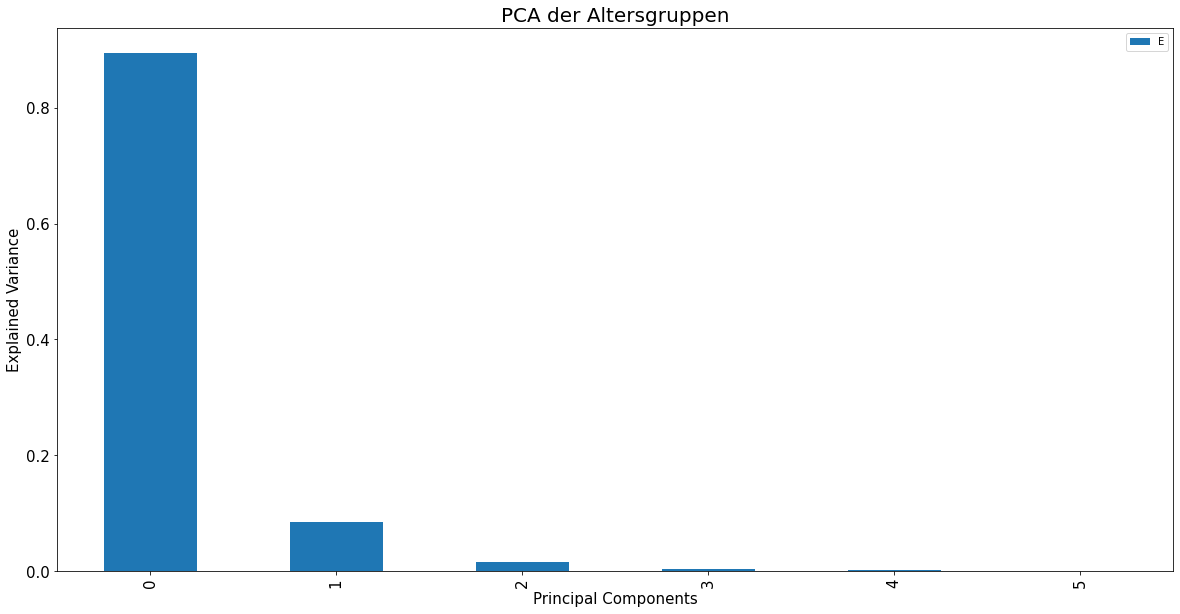

In [ ]:
df_ag_pca = inz_ag_sum_all.fillna(0)

n_comp_ag = df_ag_pca.shape[1]

pca_ag = PCA(n_components=n_comp_ag, random_state=0)

pca_ag_df = pd.DataFrame(pca_ag.fit_transform(df_ag_pca), index=df_ag_pca.index)

print("Sum Variance: ", pca_ag.explained_variance_.sum())

ax = pd.DataFrame(pca_ag.explained_variance_ratio_).plot(kind="bar",
                                           figsize=[20,10],
                                           fontsize=15
                                           )
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_ylabel("Explained Variance", fontsize=15)
ax.set_title("PCA der Altersgruppen", fontsize=20)
ax.legend("Explained Variance by Compontent")

a_ag = zip(range(1, n_comp+1), pca_ag.explained_variance_ratio_)
a_ag = pd.DataFrame(a, columns=["Principal components", "Explained variance"])


Text(0.5, 0, 'Meldedatum')

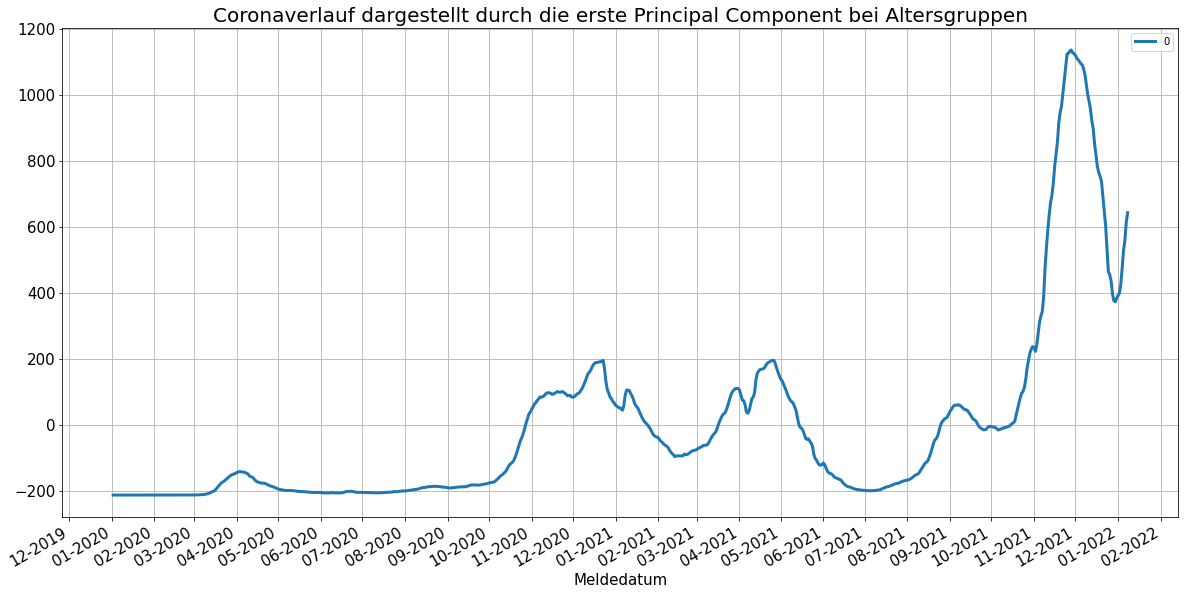

In [ ]:
ax = pca_ag_df[[0]].plot(figsize=[20,10],
                         fontsize=15,
                         lw=3)

ax.set_title("Coronaverlauf dargestellt durch die erste Principal Component bei Altersgruppen", fontsize=20)
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.grid()
ax.set_xlabel("Meldedatum", fontsize=15)

### PCA der Landkreise

In [ ]:
df_lk_bv = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/Kreise_Bewohner.xlsx")
df_lk_bv.drop([324], inplace=True)
df_lk_bv = df_lk_bv.set_index("Stadtkreis")["Bewohner"]


In [ ]:
lk_fälle = gefiltert_inf.groupby(["Meldedatum", "Landkreis"])["AnzahlFall"].sum().reset_index(level=1)

landkreise = data.Landkreis.unique() 

lk_inz_all = pd.DataFrame(index = lk_fälle.index.unique())

for landkreis in landkreise:
    lk_inz = lk_fälle[(lk_fälle.Landkreis == landkreis)].rolling(7).sum()/df_lk_bv[landkreis]*100000
    lk_inz_all = lk_inz_all.join(lk_inz, lsuffix="Meldedatum")

lk_inz_all.columns = landkreise

NameError: ignored

In [ ]:
df_lk_pca = lk_inz_all.fillna(0)

n_comp_lk = df_lk_pca.shape[1]

pca_lk = PCA(n_components = n_comp_lk, random_state=0)

pca_lk_df = pd.DataFrame(pca_lk.fit_transform(df_lk_pca), index=df_lk_pca.index)

ax = pd.DataFrame(pca_lk.explained_variance_ratio_).plot(kind="bar",
                                                         figsize=[20,10],
                                                         fontsize=15)

ax.set_title("PCA der Landkreise", fontsize=20),
ax.set_ylabel("Explained Variance Ratio", fontsize=15)
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_xlim(-.5,20.5)

NameError: ignored

Text(0.5, 0, 'Meldedatum')

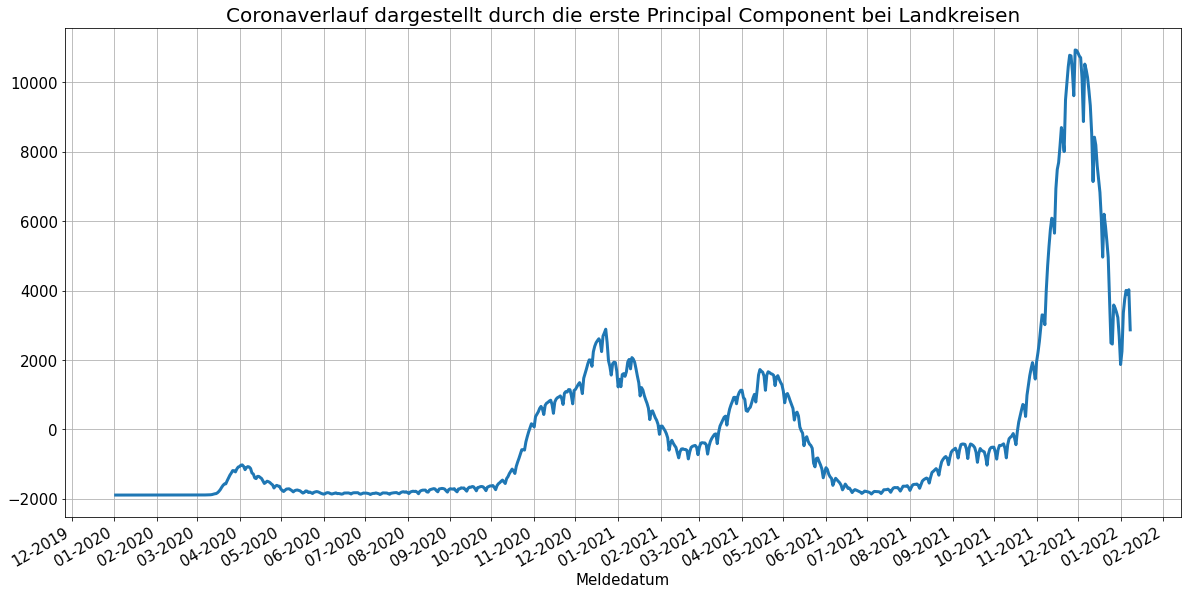

In [ ]:
ax_pc_bl = pca_lk_df[0].plot(kind="line",
                             figsize=[20,10],
                             lw=3,
                             fontsize=15)

ax_pc_bl.set_title("Coronaverlauf dargestellt durch die erste Principal Component bei Landkreisen", fontsize=20)
ax_pc_bl.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax_pc_bl.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax_pc_bl.grid()
ax_pc_bl.set_xlabel("Meldedatum", fontsize=15)

# Corona Weltweit

In [ ]:
data_world["date"] = pd.to_datetime(data_world.date)
data_world["location"] = data_world.location.replace({"United States": "United States of America",
                                                     "South Korea": "Republic of Korea"})


In [ ]:
data_world.location.unique()#.groupby(["date", "location"])["new_cases", "new_deaths"].sum()

In [ ]:
df_world = data_world[(data_world.location == "Portugal") | 
           (data_world.location == "United States of America") |
           (data_world.location == "France") | 
           (data_world.location == "Spain") |
           (data_world.location == "United Kingdom") |
           (data_world.location == "India") |
           (data_world.location == "Germany") |
           (data_world.location == "Australia") |
           (data_world.location == "China")][["location",
                                                  "new_cases",
                                                  "new_cases_per_million",
                                                  "new_deaths", 
                                                  "new_deaths_per_million",
                                                  "date"]].fillna(0)

Text(0.5, 0, 'Länder')

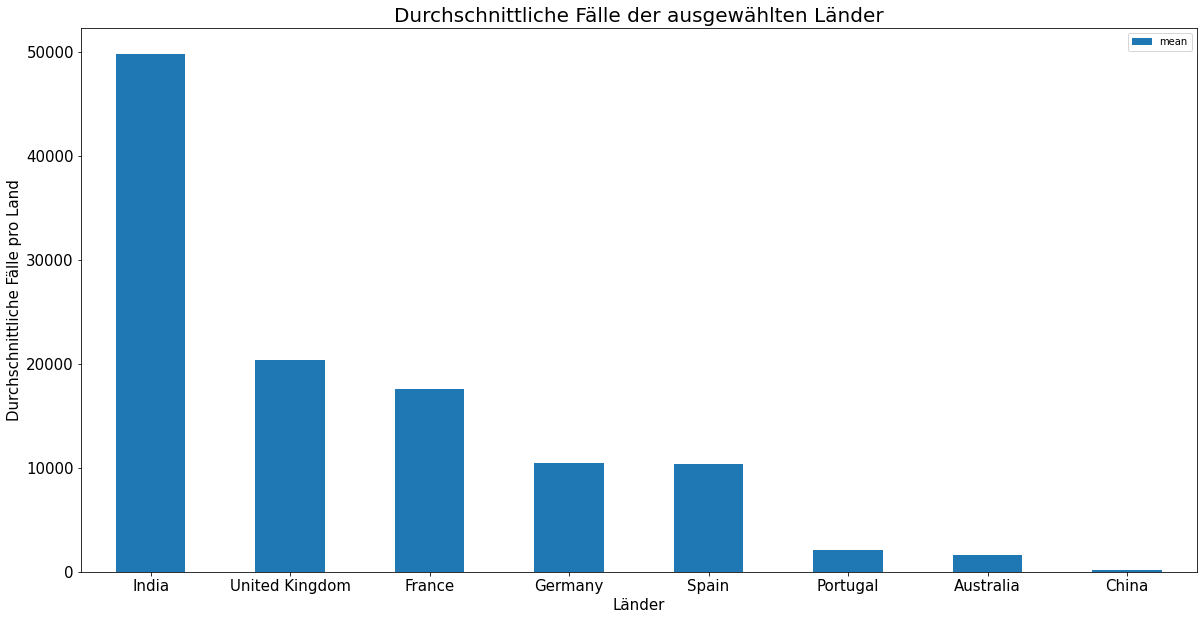

In [ ]:
ax = df_world.pivot(index="date", columns="location")["new_cases"].fillna(0).describe()[1:2].transpose().sort_values(by="mean", ascending=False).plot(kind="bar", 
                                                                                                                                     figsize=[20,10],
                                                                                                                                     rot=0,
                                                                                                                                     fontsize=15
                                                                                                                                     )

ax.set_ylabel("Durchschnittliche Fälle pro Land", fontsize=15)
ax.set_title("Durchschnittliche Fälle der ausgewählten Länder", fontsize=20)
ax.set_xlabel("Länder", fontsize=15)

In [ ]:
df_world.pivot(index="date", columns="location")["new_cases"].fillna(0).describe()[1:2].round(2)

location,Australia,China,France,Germany,India,Portugal,Spain,United Kingdom,United States of America
mean,1196.87,143.13,16630.83,10430.84,49191.06,2086.2,9965.1,19785.31,82598.79


Text(0.5, 0, 'Länder')

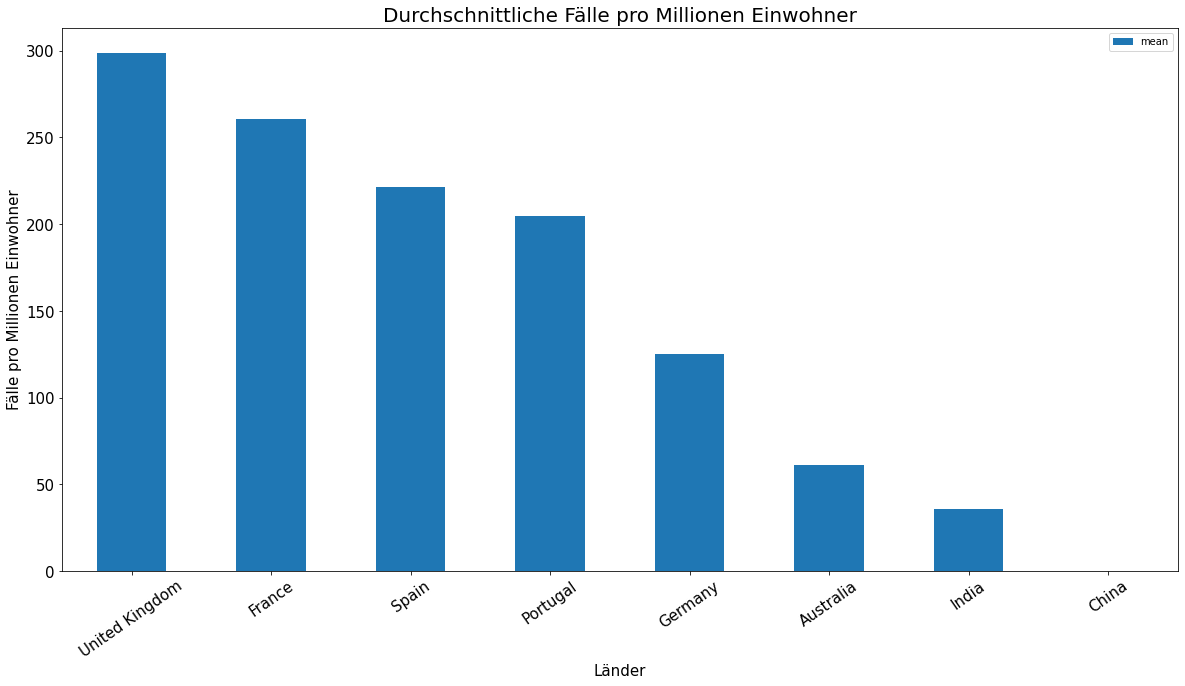

In [ ]:
ax = df_world.pivot(index="date", columns="location")["new_cases_per_million"].fillna(0).describe()[1:2].transpose().sort_values(by="mean", ascending=False).plot(kind="bar", 
                                                                                                                                     figsize=[20,10],
                                                                                                                                     rot=35,
                                                                                                                                     fontsize=15,
                                                                                                                                     )

ax.set_ylabel("Fälle pro Millionen Einwohner", fontsize=15)
ax.set_title("Durchschnittliche Fälle pro Millionen Einwohner", fontsize=20)
ax.set_xlabel("Länder", fontsize=15)

Text(0.5, 0, 'Länder')

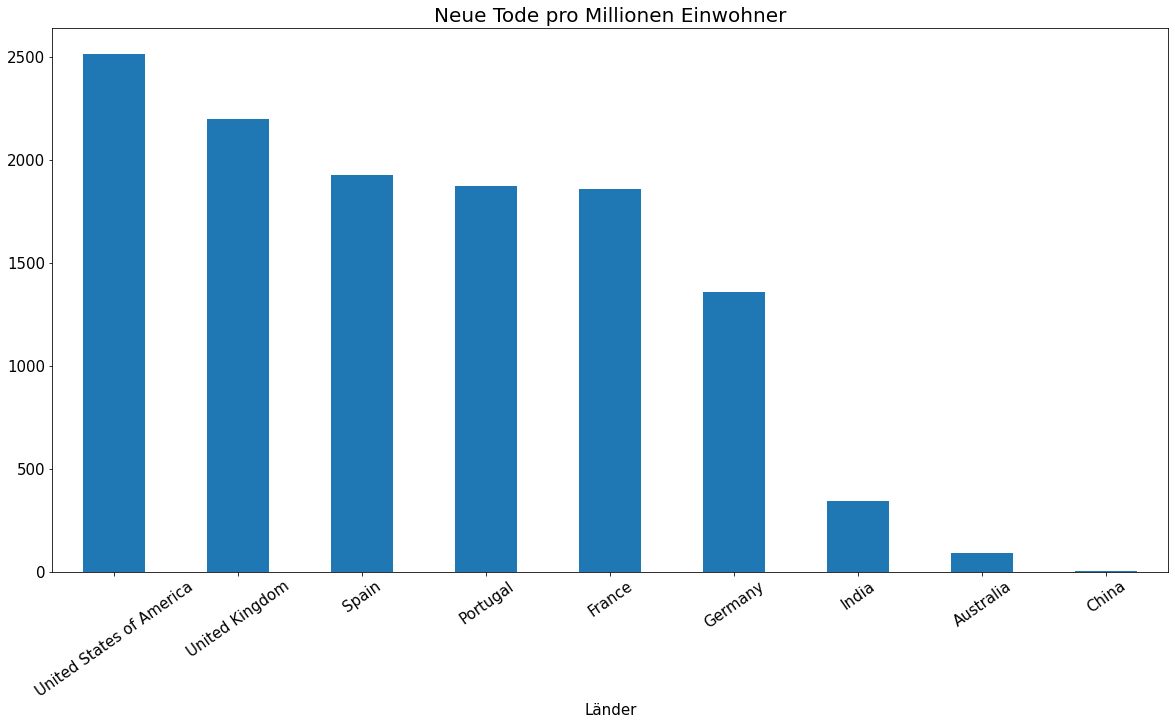

In [ ]:
ax = df_world.groupby("location")["new_deaths_per_million"].sum().sort_values(ascending=False).plot(kind="bar",
                                                                                           figsize=[20,10],
                                                                                           rot=35,
                                                                                           fontsize=15
                                                                                           )

ax.set_title("Neue Tode pro Millionen Einwohner", fontsize=20)
ax.set_xlabel("Länder", fontsize=15)

### Fälle pro Millionen nach ausgewählten Ländern im 7 Tage Schnitt

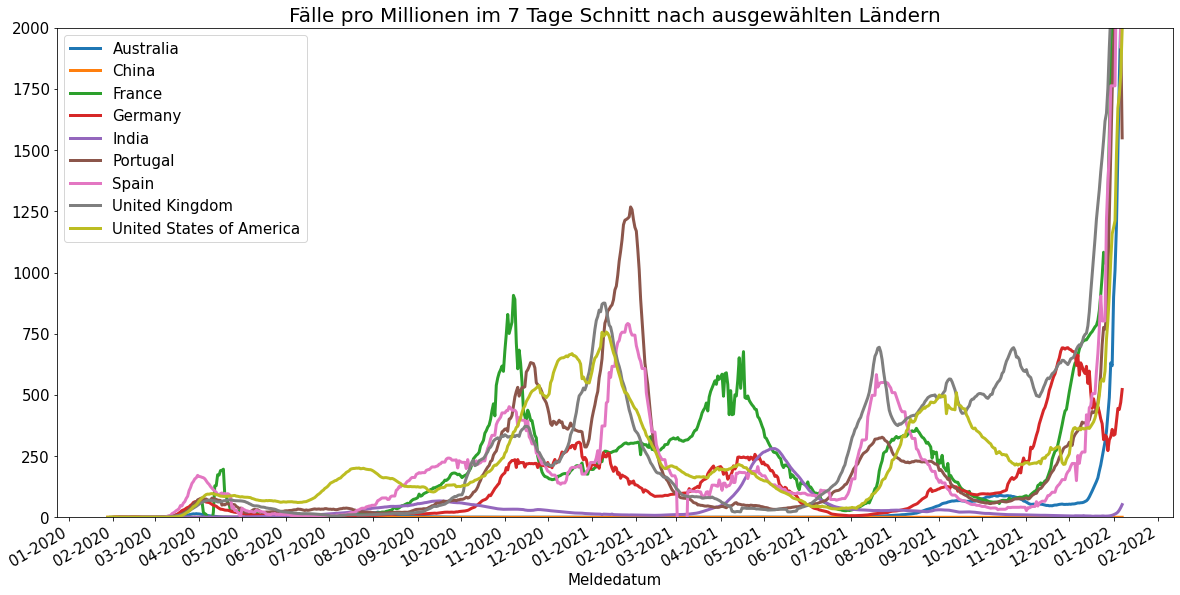

In [ ]:
ax = (df_world.pivot(index="date", columns=["location"])["new_cases_per_million"].rolling(7).mean()).plot(
                                                                                     figsize=[20,10],
                                                                                     fontsize=15,
                                                                                     lw=3)

ax.set_ylim(0,2000)
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.set_title("Fälle pro Millionen im 7 Tage Schnitt nach ausgewählten Ländern", fontsize=20)
ax.set_xlabel("Meldedatum", fontsize=15)
ax.legend(fontsize=15)

### Neue Fälle im 7 Tage Schnitt


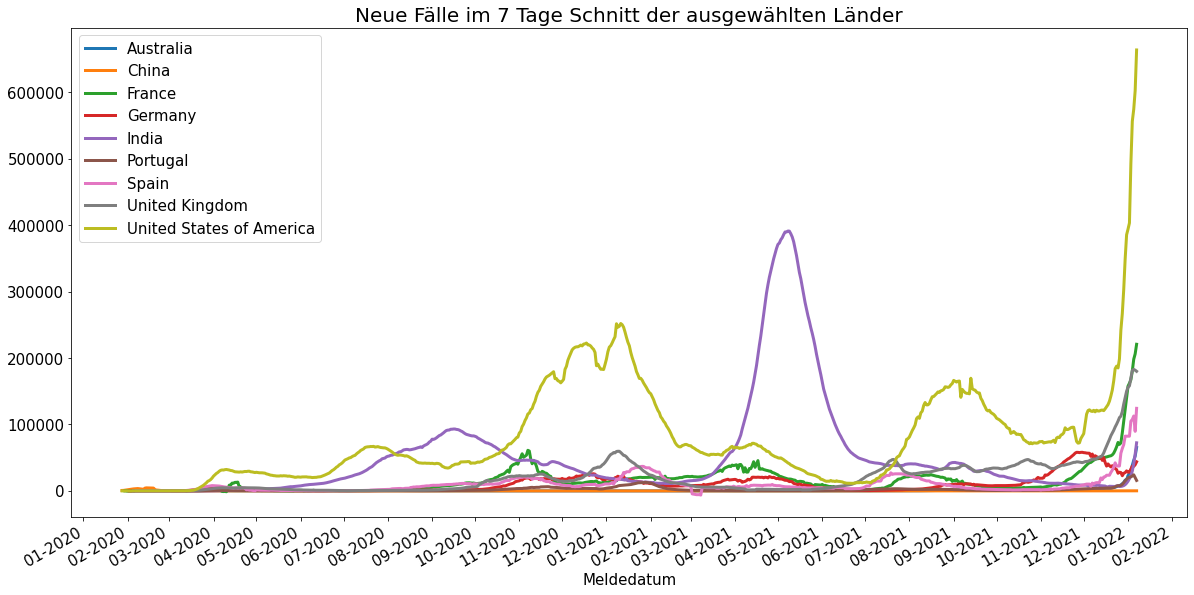

In [ ]:
ax = (df_world.pivot(index="date", columns=["location"])["new_cases"].rolling(7).mean()).plot(
                                                                                     figsize=[20,10],
                                                                                     fontsize=15,
                                                                                     lw=3)

#ax.set_ylim(0,1500)
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.set_title("Neue Fälle im 7 Tage Schnitt der ausgewählten Länder", fontsize=20)
ax.set_xlabel("Meldedatum", fontsize=15)
ax.legend(fontsize=15)

Text(0.5, 0, 'Meldedatum')

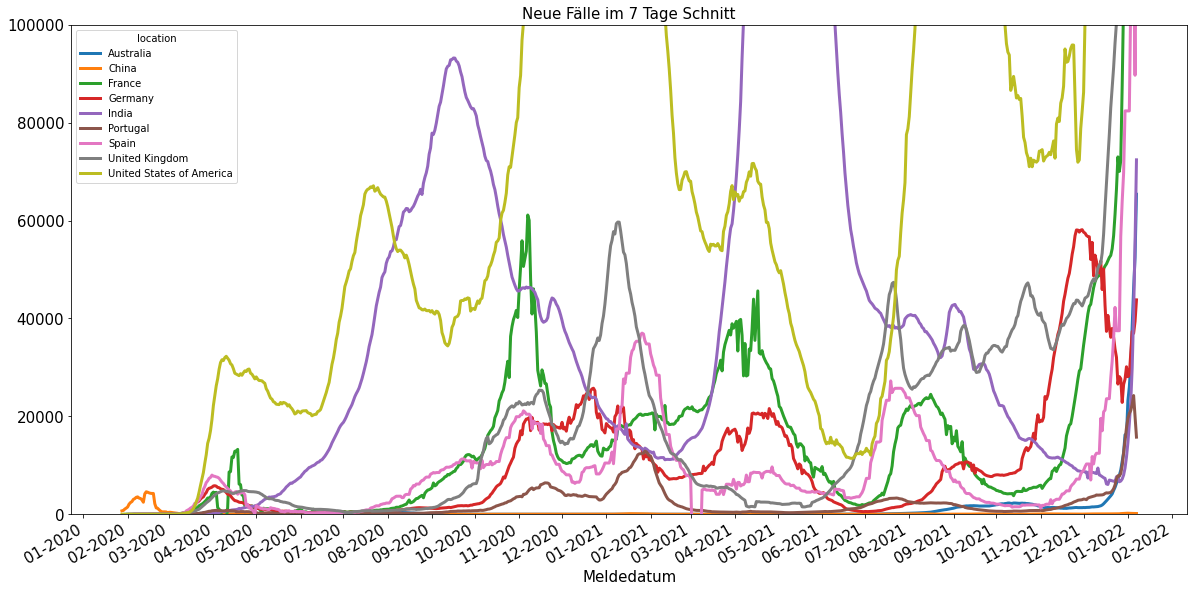

In [ ]:
ax = (df_world.pivot(index="date", columns=["location"])["new_cases"].rolling(7).mean()).plot(
                                                                                     figsize=[20,10],
                                                                                     fontsize=15,
                                                                                     lw=3)

ax.set_ylim(0,100000)
ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
ax.set_title("Neue Fälle im 7 Tage Schnitt", fontsize=15)
ax.set_xlabel("Meldedatum", fontsize=15)

### PCA Neuer Fälle Ausgewählter Länder  

Sum Variance 8847482155.542208


Text(0.5, 1.0, 'PCA der ausgewählten Länder')

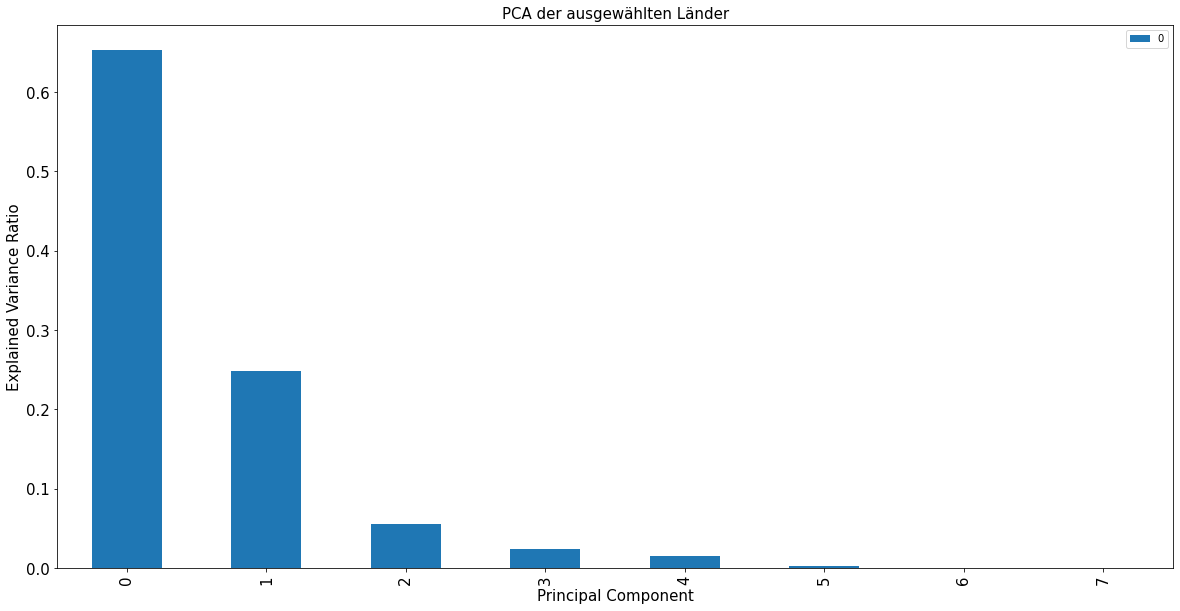

In [ ]:
df_world_nc = df_world.pivot(index="date", columns=["location"])["new_cases"].fillna(0)

n_comps_nc = df_world_nc.shape[1]

pca_nc = PCA(n_components=n_comps_nc, random_state=0)

df_pca_nc = pca_nc.fit_transform(df_world_nc)

print("Sum Variance", pca_nc.explained_variance_.sum())

ax = pd.DataFrame(pca_nc.explained_variance_ratio_).plot(kind="bar",
                                                        figsize=[20,10],
                                                        fontsize=15)

ax.set_xlabel("Principal Component", fontsize=15)
ax.set_ylabel("Explained Variance Ratio", fontsize=15)
ax.set_title("PCA der ausgewählten Länder", fontsize=15)

### PCA Fälle pro Millionen Einwohner nach ausgewählten Ländern  Daten

Sum Variance 1067222.2856147469


Text(0, 0.5, 'Explained Variance Ratio')

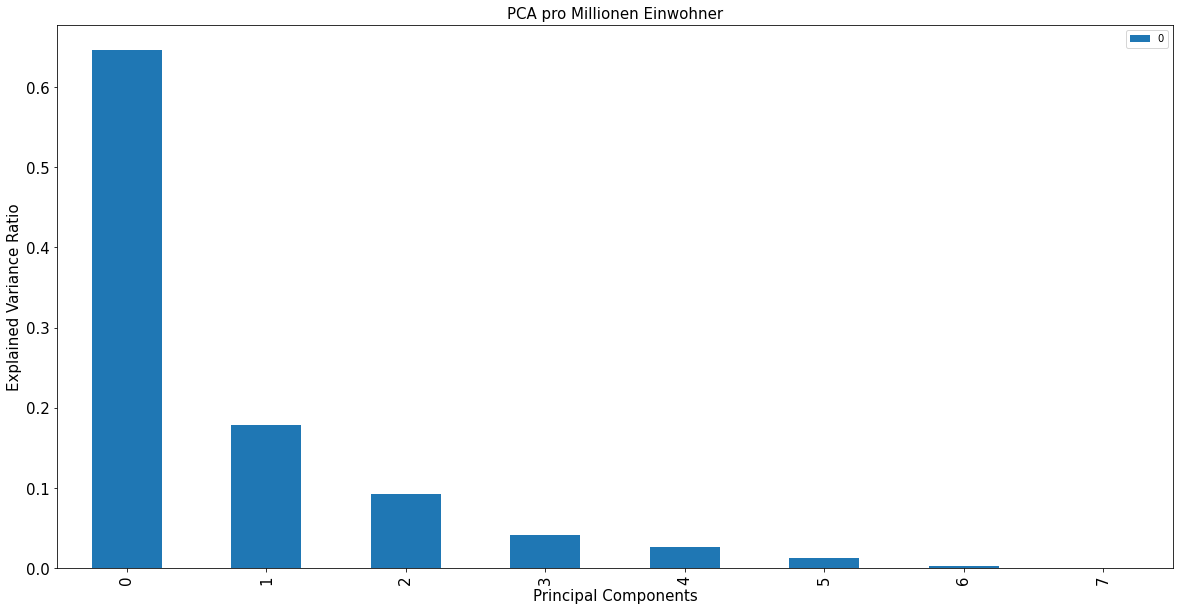

In [ ]:
df_pca_ww_inz = df_world.pivot(index="date", columns=["location"])["new_cases_per_million"].fillna(0)

pca_ww_inz = PCA(n_components=df_pca_ww_inz.shape[1], random_state=0)

df_pca_ww = pca_ww_inz.fit_transform(df_pca_ww_inz)

print("Sum Variance", pca_ww_inz.explained_variance_.sum())

ax = pd.DataFrame(pca_ww_inz.explained_variance_ratio_).plot(kind="bar",
                                                       figsize=[20, 10],
                                                       fontsize=15)

ax.set_title("PCA pro Millionen Einwohner", fontsize=15)
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_ylabel("Explained Variance Ratio", fontsize=15)

### Neue Fälle weltweit

In [ ]:
data_world.groupby(["location", "date"]).sum().reset_index(level=0)[["location", "new_cases_per_million", "new_deaths_per_million"]].pivot(columns="location")["new_cases_per_million"].fillna(0)[["World", "Germany"]].plot(
    figsize=[20,10]
)

### Neue Todesfälle weltweit 

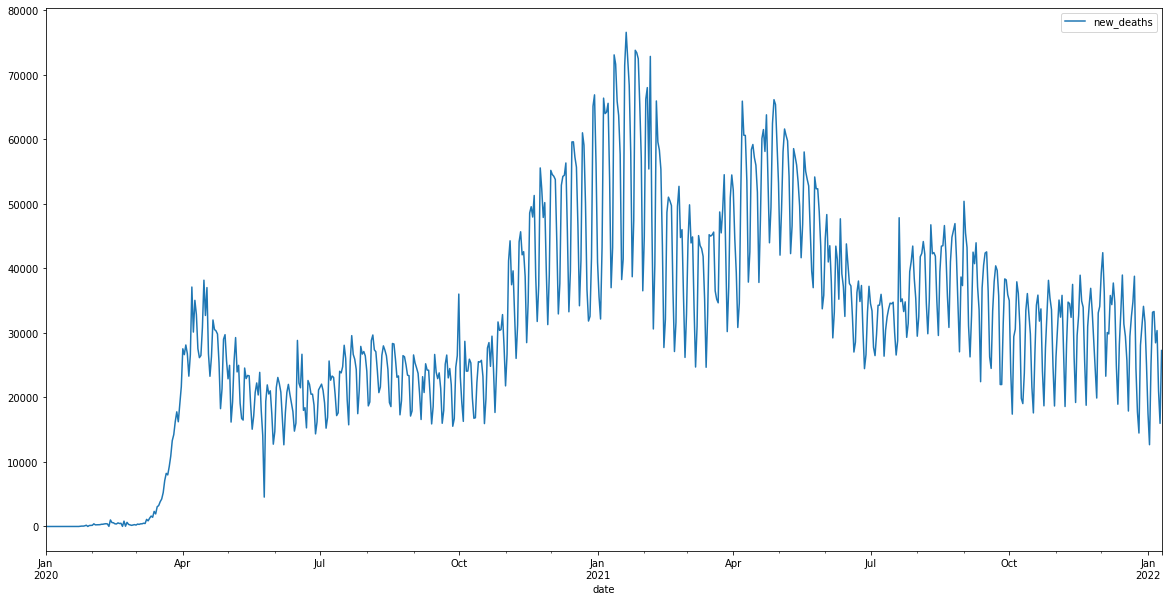

In [ ]:
data_world.groupby(["date"])[["new_deaths"]].sum().plot(kind="line",
                                                          figsize=[20,10])

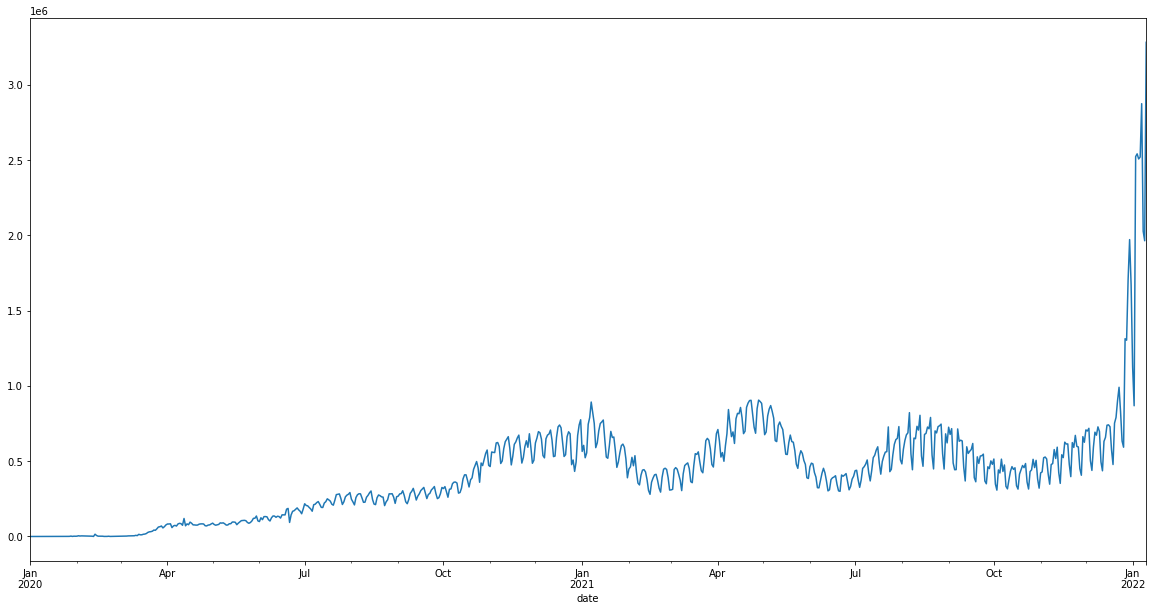

In [ ]:
data_world.groupby(["location", "date"]).sum().reset_index(level=0)[["location", "new_cases", "new_deaths"]].pivot(columns="location")["new_cases"].fillna(0)["World"].plot(figsize=[20,10])

In [ ]:
ww_pca_df = data_world.groupby(["date", "location"])["new_cases_per_million"].sum().reset_index(level=1).pivot(columns="location").fillna(0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(-0.5, 20.5)

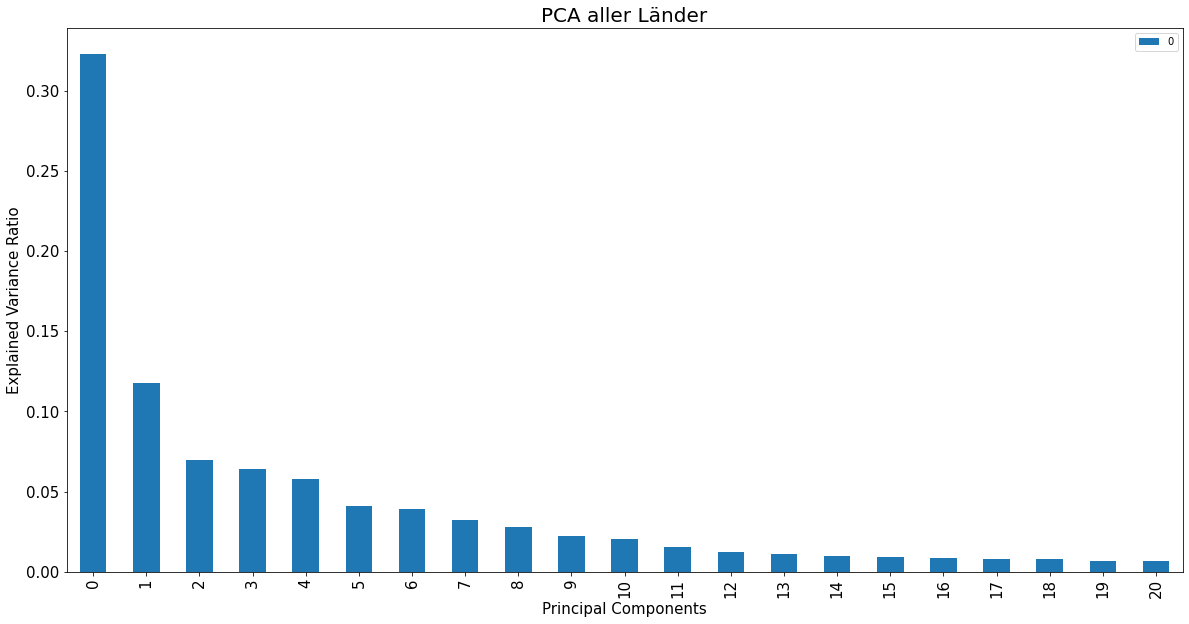

In [ ]:
ww_pca = PCA(n_components=ww_pca_df.shape[1], random_state=0)

ww_pca.fit(ww_pca_df)

ax = pd.DataFrame(ww_pca.explained_variance_ratio_).plot(kind="bar",
                                                    figsize=[20, 10],
                                                    fontsize=15)

ax.set_title("PCA aller Länder", fontsize=20)
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_ylabel("Explained Variance Ratio", fontsize=15)
ax.set_xlim(-.5,20.5)

In [ ]:
data_world_new = data_world.groupby(["location", "date"])[["new_cases", "new_cases_per_million"]].sum().drop(index=["Europe", "European Union", "International", "Lower middle income", "Low income", 
                 "Micronesia (country)", "World", "Upper middle income", "South America","High income", 
                 "North America", "Asia", "Africa"]).reset_index(level=0)

In [ ]:
df_ww_pca = data_world_new.pivot(columns="location", values="new_cases_per_million").fillna(0)


(-0.5, 20.5)

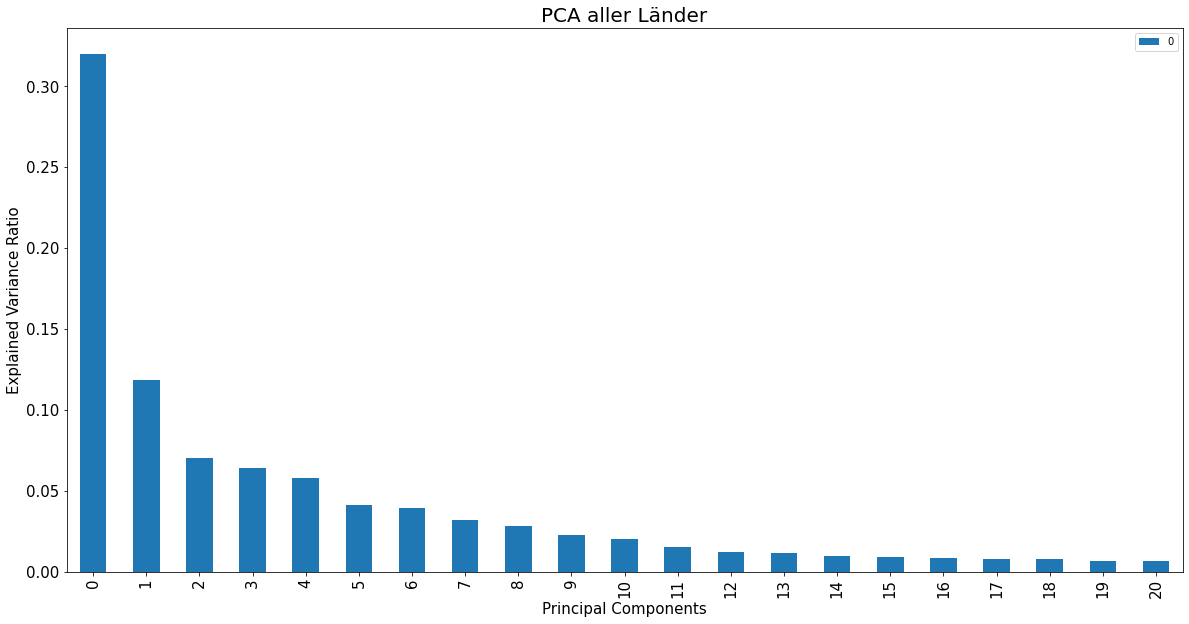

In [ ]:
ww_pca_new = PCA(n_components=df_ww_pca.shape[1], random_state=0)

ww_pca_new.fit(df_ww_pca)

ax = pd.DataFrame(ww_pca_new.explained_variance_ratio_).plot(kind="bar",
                                                    figsize=[20, 10],
                                                    fontsize=15)

ax.set_title("PCA aller Länder", fontsize=20)
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_ylabel("Explained Variance Ratio", fontsize=15)
ax.set_xlim(-.5,20.5)

In [ ]:
ww_pca_new.explained_variance_ratio_[:10].sum()

0.7936028556679349

Text(0, 0.5, 'Fälle pro Millionen Einwohner')

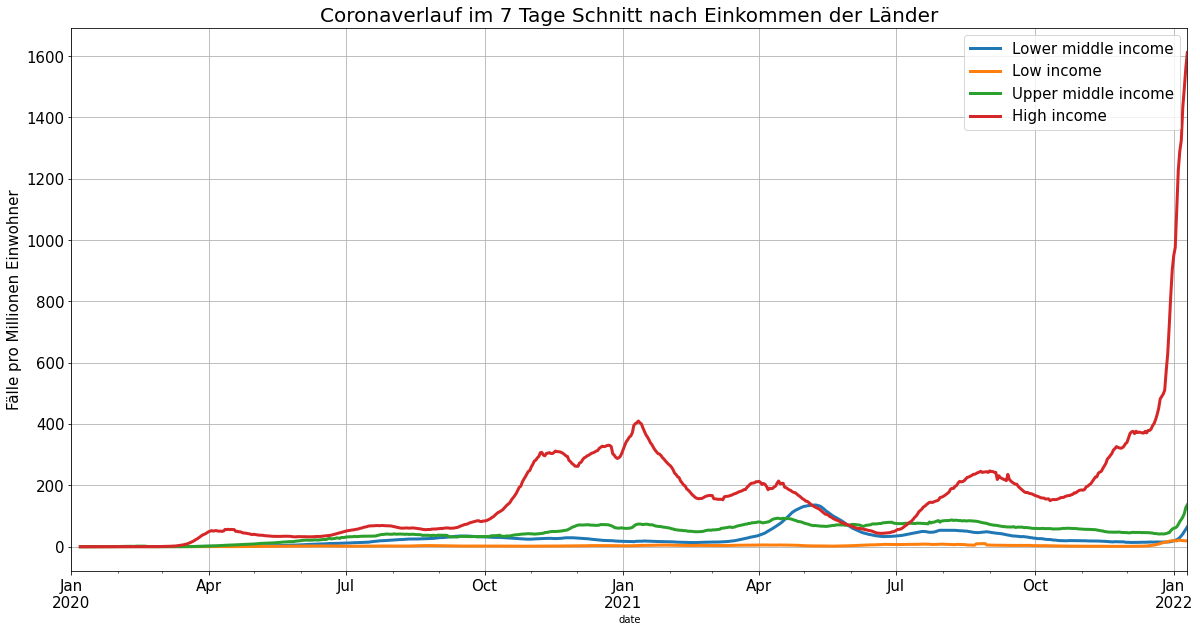

In [ ]:
ax = data_world.groupby(["date", "location"])["new_cases_per_million"].sum().reset_index(level=1).pivot_table(index="date", 
                                                                                                         columns="location", 
                                                                                                         values="new_cases_per_million")[[                                                                                 
                                                                                                                                          "Lower middle income", 
                                                                                                                                          "Low income", 
                                                                                                                                          "Upper middle income", 
                                                                                                                                          "High income",]].fillna(0).rolling(7).mean().plot(kind="line",
                                                                                                                                                                          figsize=[20,10],
                                                                                                                                                                          fontsize=15,
                                                                                                                                                                          lw=3)

 
ax.grid()
ax.legend(fontsize=15)
ax.set_title("Coronaverlauf im 7 Tage Schnitt nach Einkommen der Länder", fontsize=20)    
ax.set_ylabel("Fälle pro Millionen Einwohner", fontsize=15)                                                                                                                                                                 

Text(0, 0.5, 'Fälle')

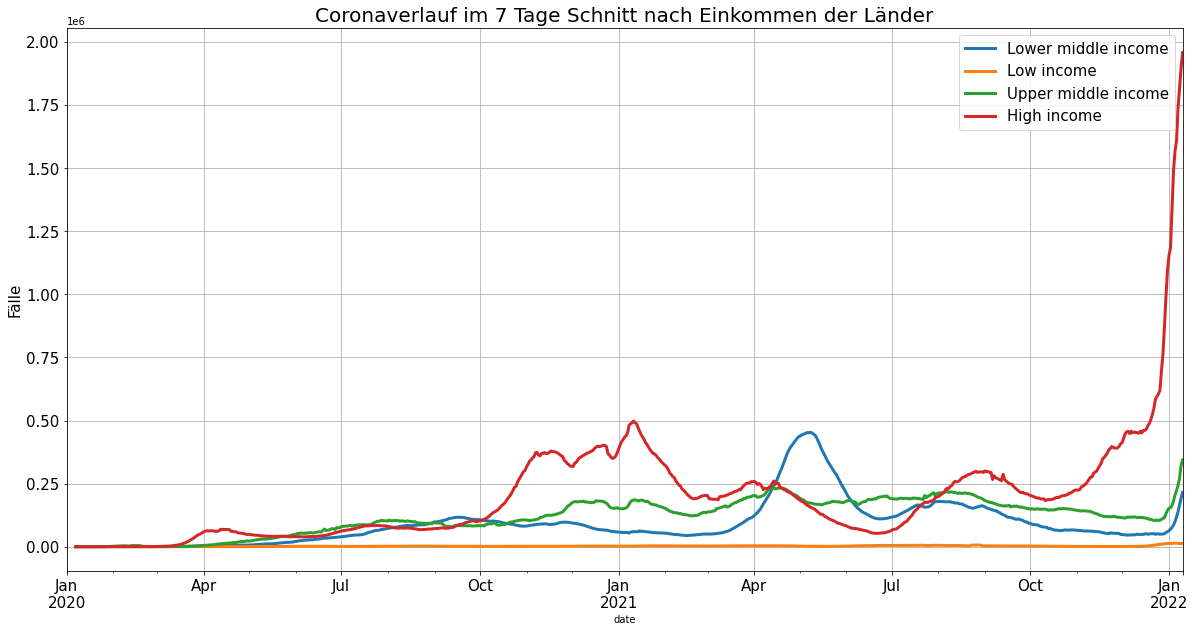

In [ ]:
ax = data_world.groupby(["date", "location"])["new_cases"].sum().reset_index(level=1).pivot_table(index="date", 
                                                                                                         columns="location", 
                                                                                                         values="new_cases")[[                                                                                 
                                                                                                                              "Lower middle income", 
                                                                                                                              "Low income", 
                                                                                                                              "Upper middle income", 
                                                                                                                              "High income",]].fillna(0).rolling(7).mean().plot(kind="line",
                                                                                                                                                                          figsize=[20,10],
                                                                                                                                                                          fontsize=15,
                                                                                                                                                                          lw=3)

 
ax.grid()
ax.legend(fontsize=15)
ax.set_title("Coronaverlauf im 7 Tage Schnitt nach Einkommen der Länder", fontsize=20)    
ax.set_ylabel("Fälle", fontsize=15)

Text(0, 0.5, 'Tote ')

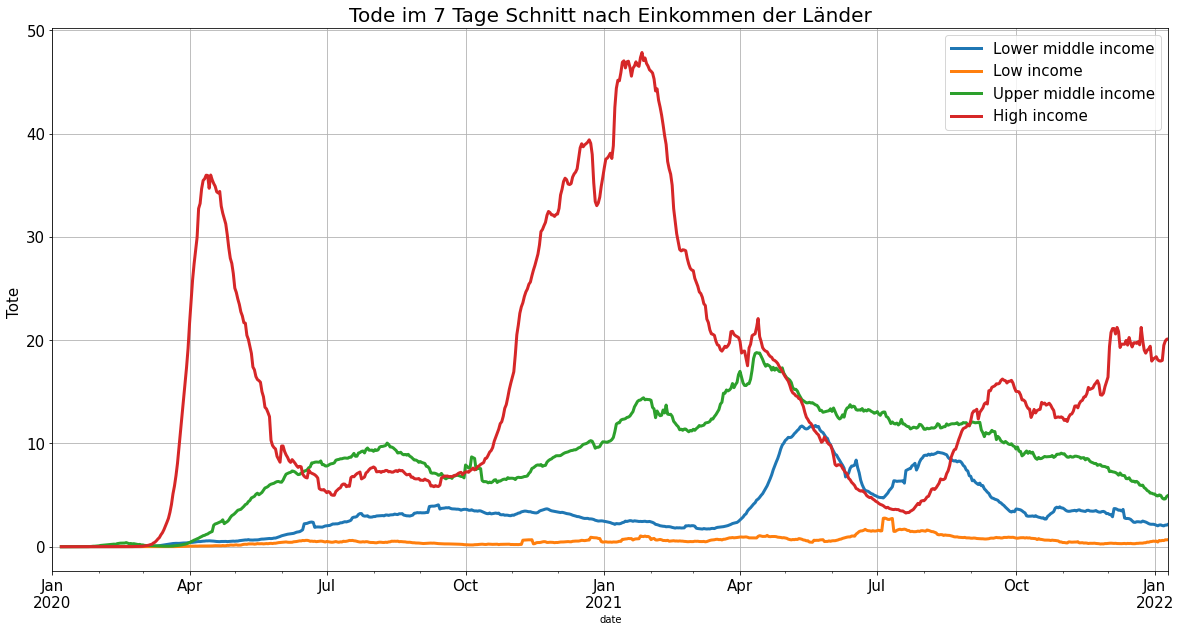

In [ ]:
ax = data_world.groupby(["date", "location"])["new_deaths_per_million"].sum().reset_index(level=1).pivot_table(index="date", 
                                                                                                         columns="location", 
                                                                                                         values="new_deaths_per_million")[[                                                                                 
                                                                                                                                          "Lower middle income", 
                                                                                                                                          "Low income", 
                                                                                                                                          "Upper middle income", 
                                                                                                                                          "High income",]].fillna(0).rolling(7).sum().plot(kind="line",
                                                                                                                                                                          figsize=[20,10],
                                                                                                                                                                          fontsize=15,
                                                                                                                                                                          lw=3)

 
ax.grid()
ax.legend(fontsize=15)
ax.set_title("Tode im 7 Tage Schnitt nach Einkommen der Länder", fontsize=20)    
ax.set_ylabel("Tote ", fontsize=15)                                                                                                                                                                 

Text(0, 0.5, 'Tode pro millionen Einwohner')

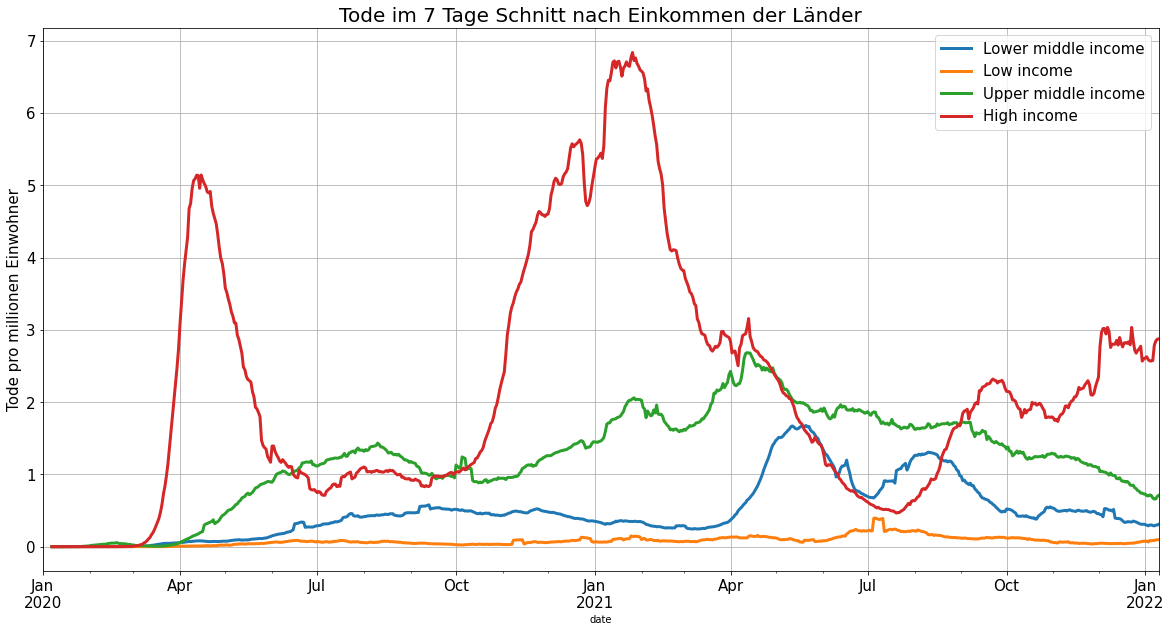

In [ ]:
ax = data_world.groupby(["date", "location"])["new_deaths_per_million"].sum().reset_index(level=1).pivot_table(index="date", 
                                                                                                         columns="location", 
                                                                                                         values="new_deaths_per_million")[[                                                                                 
                                                                                                                                          "Lower middle income", 
                                                                                                                                          "Low income", 
                                                                                                                                          "Upper middle income", 
                                                                                                                                          "High income",]].fillna(0).rolling(7).mean().plot(kind="line",
                                                                                                                                                                          figsize=[20,10],
                                                                                                                                                                          fontsize=15,
                                                                                                                                                                          lw=3)

 
ax.grid()
ax.legend(fontsize=15)
ax.set_title("Tode im 7 Tage Schnitt nach Einkommen der Länder", fontsize=20)    
ax.set_ylabel("Tode pro millionen Einwohner", fontsize=15)  

Text(0, 0.5, 'Impfungen')

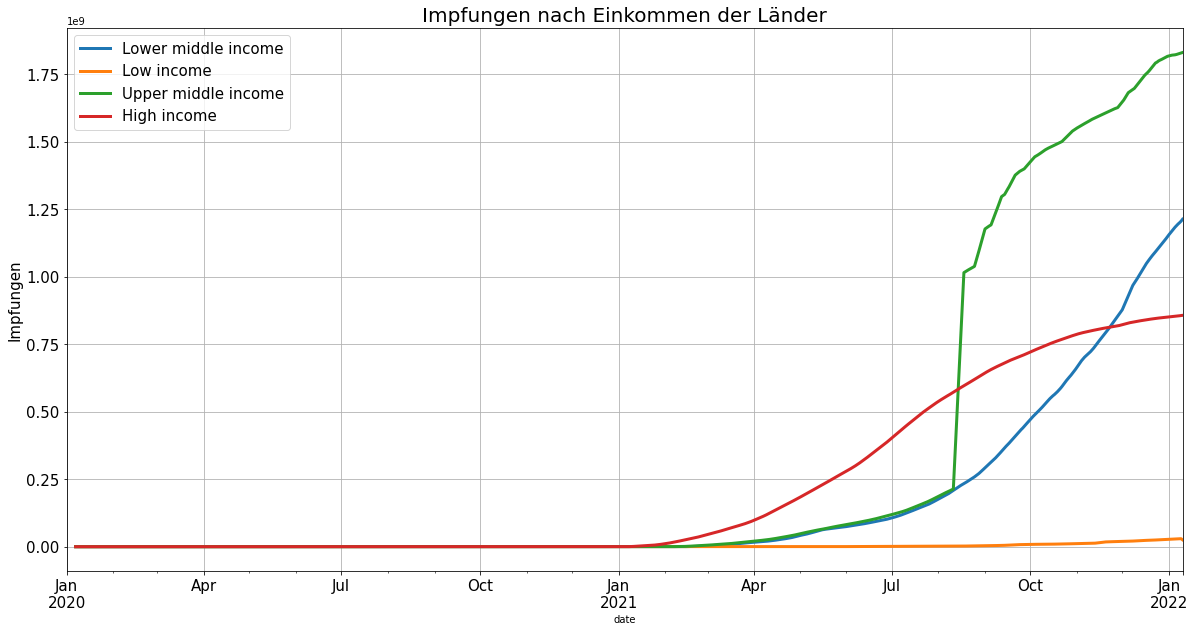

In [ ]:
ax = data_world.groupby(["date", "location"])["people_fully_vaccinated"].sum().reset_index(level=1).pivot_table(index="date", 
                                                                                                         columns="location", 
                                                                                                         values="people_fully_vaccinated")[[                                                                                 
                                                                                                                                          "Lower middle income", 
                                                                                                                                          "Low income", 
                                                                                                                                          "Upper middle income", 
                                                                                                                                          "High income",]].fillna(0).rolling(7).mean().plot(kind="line",
                                                                                                                                                                          figsize=[20,10],
                                                                                                                                                                          fontsize=15,
                                                                                                                                                                          lw=3)

 
ax.grid()
ax.legend(fontsize=15)
ax.set_title("Impfungen nach Einkommen der Länder", fontsize=20)    
ax.set_ylabel("Impfungen", fontsize=15)  

Text(0, 0.5, 'Impfungen pro 100 Einwohner')

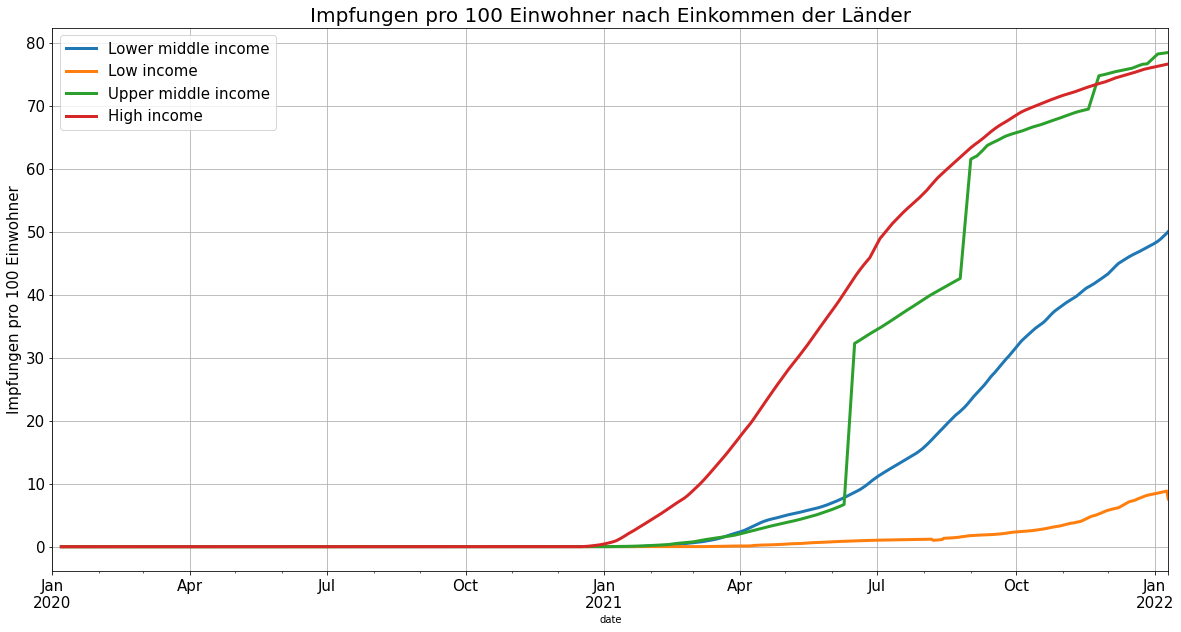

In [ ]:
ax = data_world.groupby(["date", "location"])["people_vaccinated_per_hundred"].sum().reset_index(level=1).pivot_table(index="date", 
                                                                                                         columns="location", 
                                                                                                         values="people_vaccinated_per_hundred")[[                                                                                 
                                                                                                                                          "Lower middle income", 
                                                                                                                                          "Low income", 
                                                                                                                                          "Upper middle income", 
                                                                                                                                          "High income",]].fillna(0).rolling(7).mean().plot(kind="line",
                                                                                                                                                                          figsize=[20,10],
                                                                                                                                                                          fontsize=15,
                                                                                                                                                                          lw=3)

 
ax.grid()
ax.legend(fontsize=15)
ax.set_title("Impfungen pro 100 Einwohner nach Einkommen der Länder", fontsize=20)    
ax.set_ylabel("Impfungen pro 100 Einwohner", fontsize=15)

Text(0, 0.5, 'Impfungen')

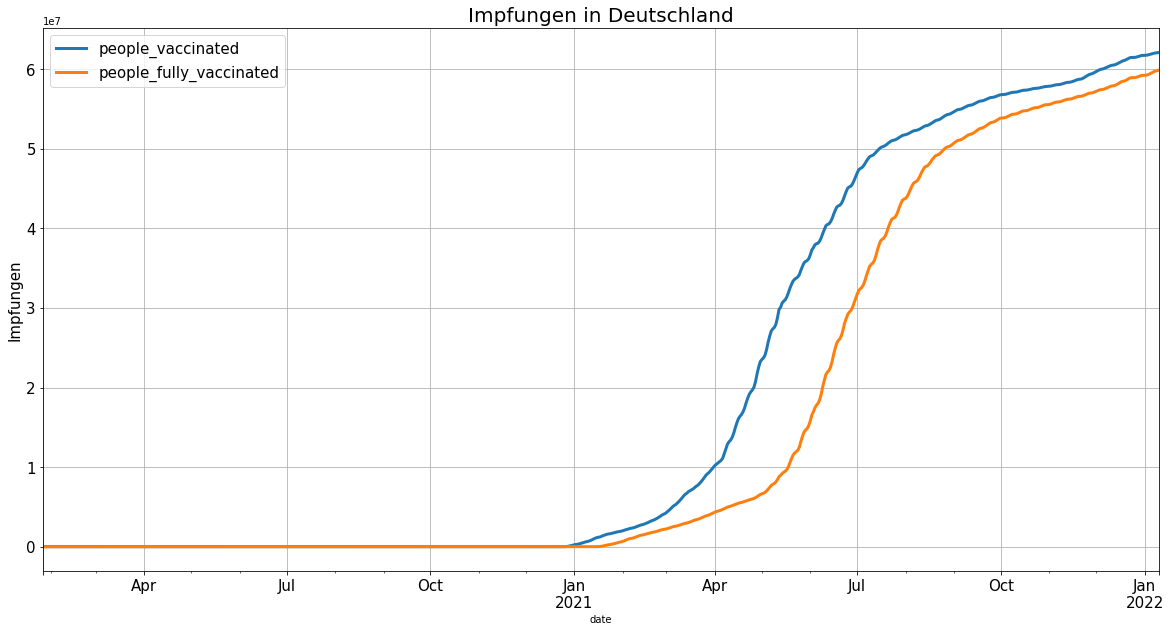

In [ ]:
ax = data_world[(data_world.location == "Germany")].set_index("date")[["people_vaccinated", "people_fully_vaccinated"]].fillna(0).plot(kind="line",
                                                                                                          figsize=[20,10],
                                                                                                          fontsize=15,
                                                                                                          lw=3)

ax.grid()
ax.legend(fontsize=15)
ax.set_title("Impfungen in Deutschland", fontsize=20)    
ax.set_ylabel("Impfungen", fontsize=15)  